# 이커머스 데이터

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
# 데이터 불러오고 전처리하기
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url ="https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

user_metadata_df = pd.read_csv(user_metadata_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

In [3]:
user_metadata_df.shape, user_stats_df.shape

((3412, 10), (3412, 11))

In [4]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2


In [5]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


In [6]:
user_metadata_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

In [7]:
# 생일년도 사용하여 2021년 기준 고객 나이정보 생성하기
this_year = 2021
user_metadata_df["age"] = this_year - user_metadata_df["birthday_year"] + 1
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23


In [8]:
# 가입일자 사용하여 2021년 1월 1일 기준 고객 가입기간 생성하기
today_ymd=datetime(2021, 1, 1)

# 가입일자(object) -> 날짜형식 변경
user_metadata_df["joined_date"] = user_metadata_df["joined_date"].astype("datetime64[ns]")

user_metadata_df["days_from_joined"] = (today_ymd - user_metadata_df["joined_date"]).dt.days
user_metadata_df["years_from_joined"] = (today_ymd - user_metadata_df["joined_date"]) / np.timedelta64(1, "Y")
user_metadata_df["years_from_joined"] = user_metadata_df["years_from_joined"].round(1)
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2


In [9]:
# 탈퇴일자 생성하기
# 1: 탈퇴함, 0:탈퇴하지않음
user_metadata_df["if_deleted"] = np.where(user_metadata_df["deleted_date"]=="NaT", 0, 1)

In [10]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2,0


In [11]:
user_stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

In [12]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


In [13]:
# 마지막 거래일자 범위 확인
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [14]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여 Recency의 정도를 알아보는 커럼 생성하기
oldest_ymd = datetime(2019,12,31)
user_stats_df["last_date"] = user_stats_df["last_date"].astype("datetime64[ns]")
user_stats_df["days_of_recency"] = (user_stats_df["last_date"] - oldest_ymd).dt.days

In [15]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


In [16]:
user_metadata_df.isnull().sum(axis=0)

user_id                 0
sex                     0
birthday_year           0
membership_type         0
category_prefer         0
joined_date             0
deleted_date            0
join_path            2888
os                      0
recommended_cnt         0
age                     0
days_from_joined        0
years_from_joined       0
if_deleted              0
dtype: int64

In [17]:
user_metadata_df["join_path"] = user_metadata_df["join_path"].fillna(0)

In [18]:
# user_id 기준으로 중복데이터 확인
user_metadata_df[user_metadata_df.duplicated(["user_id"])]
# 중복 데이터 삭제
user_metadata_df.drop_duplicates(subset="user_id")

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,0.0,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,0.0,AOS,2,23,422,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,K0qchcNENCEDzPH,1,1995,100,5,2019-02-08,NaT,0.0,AOS,3,27,693,1.9,0
3408,EgkSw32Hq7ueGrf,0,1981,100,0,2019-09-05,NaT,0.0,AOS,0,41,484,1.3,0
3409,wvzkibB8S2Oth9b,0,1978,100,0,2017-10-16,NaT,0.0,AOS,0,44,1173,3.2,0
3410,8WI83Ev0nnBfMB7,1,1988,100,8,2017-12-06,NaT,0.0,AOS,0,34,1122,3.1,0


In [19]:
# membership_type 별 고객분포 확인
user_metadata_df.groupby(["membership_type"])[["user_id"]].count()

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [20]:
# 가입기간에 따른 고객 분포 확인하기
user_cnt_from_joined_df = user_metadata_df.groupby(["years_from_joined"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_from_joined_df, x="years_from_joined", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [21]:
# 카테고리 선호 입력수에 따른 고객 분포 확인

user_cnt_by_ctg_df = user_metadata_df.groupby(["category_prefer"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_ctg_df, x="category_prefer", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [22]:
# 친구추천 횟수에 따른 고객 분포 확인

user_cnt_by_recomm_df = user_metadata_df.groupby(["recommended_cnt"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_recomm_df, x="recommended_cnt", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [23]:
# 고객(메타데이터) 2차원에서 살펴보기
# 변수 간 상관계수 확인
corr_matrix = user_metadata_df.corr()
corr_matrix

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [24]:
corr_matrix[abs(corr_matrix)>=0.2] # 상관계수가 절대값 기준 0.2 이상인 것을 출력

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,0.25895,-1.000000,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,-0.504292,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,0.258950,NaN,NaN,NaN,1.00000,-0.258950,NaN,NaN,NaN
age,NaN,-1.000000,NaN,-0.504292,NaN,-0.25895,1.000000,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [26]:
# age & category_prefer 관계를 나타내는 scatter plot 그리기
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["category_prefer"])
fig.update_layout(width=600, height=500)
fig.show()

In [27]:
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["recommended_cnt"])
fig.update_layout(width=600, height=500)
fig.show()

In [28]:
user_metadata_df.pivot_table(values="user_id", index="sex", columns="join_path", aggfunc="count")

join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


In [29]:
# 고객 메타데이터 정제 및 데이터셋 분리
# 군집분석을 위한 변수만 남기기 - str / categorical 변수는 clustering에 적합하지 않음.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
user_numerics_df = user_metadata_df.select_dtypes(include=numerics_types)
user_numerics_df.head()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,27,480,1.3,0
1,1,1995,300,2,0.0,1,27,263,0.7,0
2,1,1999,300,4,0.0,6,23,745,2.0,0
3,0,1998,300,7,0.0,2,24,716,2.0,0
4,1,1999,300,6,0.0,2,23,422,1.2,0


In [30]:
# binary 변수 제거
user_binary_cols = [col for col in user_numerics_df if np.isin(user_numerics_df[col].unique(), [0,1]).all()]
user_numerics_df = user_numerics_df.drop(user_binary_cols, axis=1)

user_numerics_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7


In [31]:
# membership_type 변수 분리하기

user_x_columns = list(user_numerics_df.columns)
user_x_columns.remove("membership_type")
user_x_columns

['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [32]:
# train/test split
X = user_numerics_df[user_x_columns]
Y = user_numerics_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [33]:
# K-means 최적의 k 찾기
from sklearn.cluster import KMeans

In [34]:
# elbow method
distortions = []
k_range = range(1, 11)

for i in k_range:
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

In [35]:
distortions

[531767353.7333455,
 155263565.06470507,
 71609886.5428839,
 41383780.98935261,
 26604983.7009951,
 18839567.53840322,
 14267079.568637129,
 10807328.53100722,
 8441003.898217574,
 6920142.925584707]

In [36]:
# x축이 k의 수, y축이 distortion
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

In [37]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(train_x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
# 각 군집의 변수별 중심값 비교
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.341977,4.692058,3.095624,32.658023,1302.771475,3.567099
1,1991.653846,4.721825,1.918605,30.346154,237.081395,0.649374
2,1990.133803,4.545272,2.189135,31.866197,732.823944,2.005231


In [39]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.959432,4.539554,2.929006,32.040568,1067.267748,2.923327
1,1991.918552,4.736048,1.858220,30.081448,135.437406,0.371041
2,1990.070853,4.504026,2.104670,31.929147,731.206119,1.998390
3,1990.996914,4.638889,1.978395,31.003086,429.083333,1.176080
4,1988.796053,4.970395,3.177632,33.203947,1477.667763,4.045395


In [40]:
# 각 군집별 데이터수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)]for x in set(label_list)]

[[0, 493], [1, 665], [2, 618], [3, 649], [4, 304]]

In [41]:
km = KMeans(n_clusters=3)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1991.653846,4.721825,1.918605,30.346154,237.081395,0.649374
1,1989.341977,4.692058,3.095624,32.658023,1302.771475,3.567099
2,1990.133803,4.545272,2.189135,31.866197,732.823944,2.005231


In [42]:
train_x["label_from_km"] = km.labels_
train_x.groupby("label_from_km").count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,1115,1115,1115,1115,1115,1115
1,617,617,617,617,617,617
2,997,997,997,997,997,997


In [43]:
# 훈련 결과 시각화
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers"),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [44]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers"),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [45]:
# 3D 그래프로 변수 3개 시각화하기
fig = go.Figure(data=[go.Scatter3d(x=train_x["recommended_cnt"],
                                   y=train_x["days_from_joined"],
                                   z=train_x["category_prefer"],
                                   mode='markers',
                                   marker=dict(color=train_x["label_from_km"]))])
fig.show()

In [46]:
# 메타데이터 정규화
# Min-Max Normalization 모듈
from sklearn.preprocessing import MinMaxScaler

In [47]:
user_numerics_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7
2,1999,300,4,6,23,745,2.0
3,1998,300,7,2,24,716,2.0
4,1999,300,6,2,23,422,1.2


In [48]:
# 메타데이터들의 값들을 0, 1 사이의 값으로 정규화하기
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_user_metadata = mm_scaler.fit_transform(user_numerics_df)
scaled_user_metadata

array([[0.71794872, 0.5       , 0.17647059, ..., 0.28205128, 0.26376652,
        0.26      ],
       [0.71794872, 0.5       , 0.11764706, ..., 0.28205128, 0.14427313,
        0.14      ],
       [0.82051282, 0.5       , 0.23529412, ..., 0.17948718, 0.40969163,
        0.4       ],
       ...,
       [0.28205128, 0.        , 0.        , ..., 0.71794872, 0.64537445,
        0.64      ],
       [0.53846154, 0.        , 0.47058824, ..., 0.46153846, 0.61729075,
        0.62      ],
       [0.79487179, 0.        , 0.29411765, ..., 0.20512821, 0.10737885,
        0.1       ]])

In [49]:
scaled_user_metadata_df = pd.DataFrame(scaled_user_metadata, columns=user_numerics_df.columns)
scaled_user_metadata_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24


In [50]:
X = scaled_user_metadata_df[user_x_columns]
Y = scaled_user_metadata_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [51]:
!pip install kneed

In [52]:
# distortions에 kneed 모듈 사용에 필요한 값 저장
distortions = []
k_range = range(1,11)

for i in k_range:
  km =KMeans(n_clusters=i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

distortions

[675.6542199219807,
 443.09454733505004,
 295.41569200677554,
 248.42873520268512,
 216.09961497599818,
 191.95748373875955,
 175.133572557924,
 162.61910756939784,
 152.7014707199557,
 143.7328510288514]

In [53]:
# kneed 모듈 사용하여 자동으로 elbow 값 찾기
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 295.416


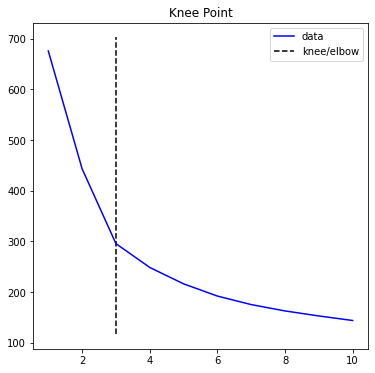

In [54]:
kneedle.plot_knee()

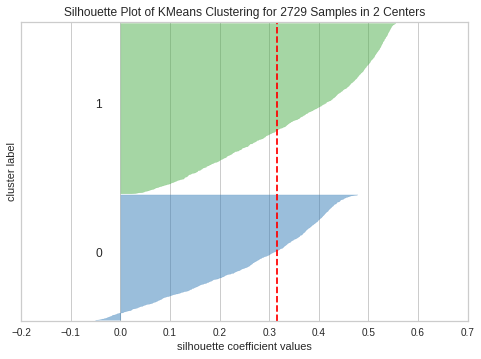

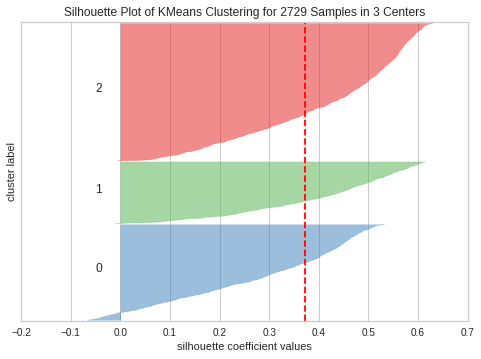

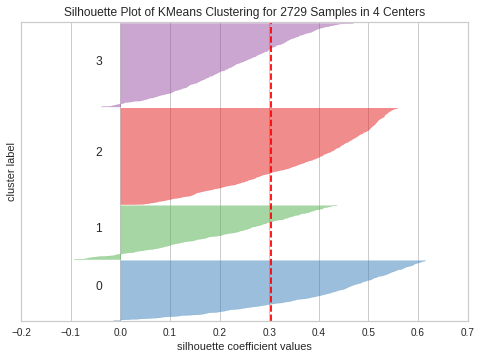

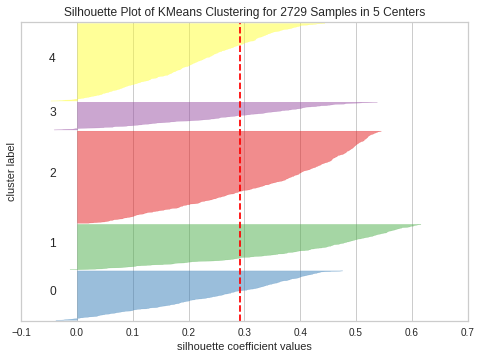

In [55]:
# SilhouetteVisualizer 사용하여 훈련과 그래프 한 번에 해겨하기
from yellowbrick.cluster import SilhouetteVisualizer

# 최소 2개 이상의 label/cluster가 존재해야함.
k_range = range(2, 6)
for i in k_range:
  km = KMeans(n_clusters = i, init="k-means++")
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

In [56]:
km = KMeans(n_clusters=3)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
# cluster의 변수별 중심점
user_metadata_cluster_centers = pd.DataFrame(km.cluster_centers_, columns=train_x.columns)
user_metadata_cluster_centers

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.730719,0.338362,0.112904,0.269281,0.198852,0.198275
1,0.304734,0.088030,0.048452,0.695266,0.296592,0.295350
2,0.620007,0.294651,0.143721,0.379993,0.639736,0.636916


In [58]:
user_metadata_label_df = train_x.copy()
user_metadata_label_df["label_from_km"] = km.labels_
user_metadata_label_df.groupby("label_from_km").count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,1275,1275,1275,1275,1275,1275
1,572,572,572,572,572,572
2,882,882,882,882,882,882


In [59]:
# 변수별 변동성 확인하기
user_metadata_cluster_centers.std()

birthday_year        0.221027
category_prefer      0.133710
recommended_cnt      0.048614
age                  0.221027
days_from_joined     0.231545
years_from_joined    0.230397
dtype: float64

In [60]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual_test", "K-means_cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [61]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means_cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [62]:
# 3D 시각화
fig = go.Figure(data=[go.Scatter3d(x=user_metadata_label_df["days_from_joined"],
                                   y=user_metadata_label_df["age"],
                                   z=user_metadata_label_df["category_prefer"],
                                   mode="markers",
                                   marker=dict(
                                            size=5,
                                            color=user_metadata_label_df["label_from_km"],
                                            opacity=0.7
                                        )
                                   )])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                      xaxis = dict(
                          title="days_from_joined"
                      ),
                      yaxis = dict(
                          title="age"
                      ),
                      zaxis = dict(
                          title="category_prefer"
                      ),
                  ),)
fig.show()

In [63]:
test_user_metadata_label_df = test_x.copy()
test_cluster = km.fit_predict(test_x)
test_user_metadata_label_df["label_from_km"] = test_cluster

In [64]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means_cluster-test"))

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=test_user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [65]:
# 훈련결과 label을 원데이터셋에 추가
trained_user_metadata_df = pd.concat([user_metadata_label_df, test_user_metadata_label_df])
trained_user_metadata_df = user_metadata_df.join(trained_user_metadata_df["label_from_km"])
trained_user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0


### 고객 거래데이터 사용

In [66]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311707 sha256=ec25c7600eb6bcd81d9b64f96255b952344d1c7b193c02529cf188698a78d848
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [67]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


In [68]:
user_stats_df.columns

Index(['user_id', 'membership_type', 'total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'last_date',
       'days_of_recency'],
      dtype='object')

In [69]:
# 수치화되지 않은 컬럼 제거하기
stats_columns = ['total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'days_of_recency']

X = user_stats_df[stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)
print(len(train_x), len(test_x))

2729 683


In [70]:
hdb_data_df = train_x.copy()

In [71]:
import hdbscan

In [72]:
# min_samples 파라미터를 비교하는 함수 만들기

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name = "hdbscan_label", x_col="total_order_cnt", y_col="total_cost"):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_samples=ms, min_cluster_size=min_cluster_size, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세 확인
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_sample={ms} >> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)

  return data_df

In [73]:
ms_list = [50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name = "hdbscan_label", x_col="avg_cost", y_col="total_cost")

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   52.172911  2.200294e+06     -829.877579      -0.933499   
0                    24.304348  7.915511e+05     -822.592820      -2.526212   
1                     1.627074  4.778766e+04     -516.341714     -66.971512   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.461133           9.190586  44342.138386   
0                      1.681157           4.581522  35401.429130   
1                      1.050571           1.165182  29909.177432   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                             
-1              28682.739712       174.161383        347  
0               21793.829348       171.315217         92  
1               18782.91622

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   51.011142  2.144942e+06     -824.215306      -1.227272   
0                    23.892473  7.821544e+05     -822.657892      -2.499048   
1                     1.550725  4.522783e+04     -515.444930     -67.302633   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.432484           9.018756  43967.458384   
0                      1.673727           4.515412  35901.319892   
1                      1.047680           1.151178  29869.358590   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                             
-1              28485.717604       174.025070        359  
0               21748.280430       171.602151         93  
1               18762.34450

In [74]:
# HDBSCAN Model 원데이터 훈련시키기
ms = 50
hdbscan_label = hdbscan.HDBSCAN(min_samples=ms, min_cluster_size=30, prediction_data=True).fit_predict(train_x)
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

In [75]:
# outlier 추세 확인
hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

# 시각화
fig = px.scatter(hdb_data_df, x="avg_cost", y="total_cost", color="hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_sample={ms} >> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
fig.show()

# 군집별 데이터 분포 확인
hdb_cluster_df = hdb_data_df.groupby("hdbscan_label").mean()
hdb_cluster_df["point_cnt"] = hdb_data_df["hdbscan_label"].value_counts()
hdb_cluster_df

,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency,point_cnt
hdbscan_label,,,,,,,,,,
-1,52.172911,2.200294e+06,-829.877579,-0.933499,2.461133,9.190586,44342.138386,28682.739712,174.161383,347
0,24.304348,7.915511e+05,-822.592820,-2.526212,1.681157,4.581522,35401.429130,21793.829348,171.315217,92
1,1.627074,4.778766e+04,-516.341714,-66.971512,1.050571,1.165182,29909.177432,18782.916223,66.690830,2290


- 앞서 훈련시킨 내용 그대로 함수 내에서가 아닌 새로 모델까지 저장을 해주고
- 각 클러스터 마다 중심점을 출력하였음.
- 각 클러스터마다 포인트가 몇 개 있는지 확인 가능.

### 고객(거래데이터) - 원데이터에서 불필요한 정보 제거하기
- 변별력이 없고 영향력이 작은 변수들을 제거하고(변수정리측면) 치우친 데이터를 거르는 과정

In [76]:
# 변수 간 상관계수
corr_matrix = user_stats_df.corr()
corr_matrix.head()

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency
membership_type,1.000000,0.754893,0.625929,-0.077751,0.032173,0.693251,0.740572,0.225769,0.168166,0.682077
total_order_cnt,0.754893,1.000000,0.844748,-0.072376,0.023624,0.920791,0.981847,0.173892,0.175134,0.525761
total_cost,0.625929,0.844748,1.000000,-0.048196,0.019927,0.792244,0.829667,0.411399,0.234354,0.428558
avg_coupon_amt,-0.077751,-0.072376,-0.048196,1.000000,0.215075,-0.056423,-0.064963,0.018707,0.000568,-0.052992
avg_point_amt,0.032173,0.023624,0.019927,0.215075,1.000000,0.025303,0.024737,0.034625,0.006286,0.027379


In [77]:
corr_matrix[corr_matrix>0.7]

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency
membership_type,1.000000,0.754893,NaN,NaN,NaN,NaN,0.740572,NaN,NaN,NaN
total_order_cnt,0.754893,1.000000,0.844748,NaN,NaN,0.920791,0.981847,NaN,NaN,NaN
total_cost,NaN,0.844748,1.000000,NaN,NaN,0.792244,0.829667,NaN,NaN,NaN
avg_coupon_amt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
avg_point_amt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,0.920791,0.792244,NaN,NaN,1.000000,0.956138,NaN,NaN,NaN
monthly_order_cnt,0.740572,0.981847,0.829667,NaN,NaN,0.956138,1.000000,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
avg_item_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
days_of_recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [78]:
selected_stats_columns = ["total_order_cnt", "avg_coupon_amt", "avg_point_amt", "avg_cost", "days_of_recency", "avg_item_cost"]

X = user_stats_df[selected_stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [79]:
hdb_data_df = train_x.copy()

ms_list = [30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="trim_hdbscan_label", x_col="avg_cost", y_col="total_order_cnt")

                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        12.031566    -1359.492509    -170.232097   
0                          9.302861     -291.087821     -11.188488   
1                          1.044444        0.000000       0.000000   
2                          1.950000       -4.166667       0.000000   
3                          3.714286      -42.456268       0.000000   
4                          1.543590       -8.892176       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  39002.850480        94.402778   21104.822538        792  
0                   29756.665796        82.138682   24079.099471       1608  
1                   44973.555556        49.688889       0.000000         45  
2                    7252.500000        77.425000

                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        10.341131    -1165.496917    -131.427169   
0                          9.553365     -236.592202     -12.216610   
1                          1.953488      -38.413621       0.000000   
2                          1.846561      -17.404920       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  36554.622173        88.970760   19569.388499       1026  
0                   29778.354534        82.445955   24031.985051       1471  
1                   14780.052791        85.093023      14.825581         43  
2                   27513.430794        78.677249      32.576296        189  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        13.474517    -1221.812952    -218.888965   
0                          2.503731      -77.335240       0.000000   
1                          8.857294     -440.185448     -14.940321   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  44218.369069        91.231986   21717.673304        569  
0                   27615.714664        81.343284     136.102985        268  
1                   28849.534371        83.181818   22749.579979       1892  


In [80]:
selected_stats_columns = ["total_order_cnt", "total_cost", "avg_cost", "days_of_recency", "monthly_order_cnt"]

trim_df = user_stats_df[user_stats_df["total_order_cnt"]>=10]

X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

504 127


In [81]:
# 결과 라벨 저장하는 df
trim_hdb_data_df = train_x.copy()

In [82]:
ms_list = [10, 20, 30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, trim_hdb_data_df, label_name="trim_hdbscan_label", x_col="avg_cost", y_col="total_order_cnt")

                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        90.247423  4.209741e+06  52532.458557   
0                         60.000000  2.214005e+06  39342.912600   
1                         27.644258  9.573071e+05  36596.110364   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       178.484536          15.494502         97  
0                        175.800000          10.326667         50  
1                        171.728291           5.163025        357  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        58.309609  2.451188e+06  44262.376584   
0                         15.428571  4.720952e+05  32519.502619   
1                         25.808081  8.573264e+05  35544.387980   
2                         34.675000  1.187213e+06  35983.626500   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       175.469751          10.137307        281  
0                        169.000000           3.317063         84  
1                        171.797980           4.925421         99  
2                        172.475000           6.191667         40  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        68.522167  2.963550e+06  46316.055862   
0                         29.967136  1.026839e+06  37045.323474   
1                         15.113636  4.600743e+05  32213.548523   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       176.738916          11.833744        203  
0                        172.314554           5.488654        213  
1                        168.511364           3.308712         88  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        51.527378  2.120744e+06  41863.037349   
0                         14.250000  4.721650e+05  34381.301111   
1                         26.694215  8.917999e+05  36061.195950   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       173.783862           9.048127        347  
0                        173.805556           3.201852         36  
1                        172.314050           5.020937        121  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        42.902778  1.707944e+06  39935.725218   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                        173.43254            7.66369        504  


In [83]:
# Normalization 적용
from sklearn.preprocessing import StandardScaler

In [84]:
X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

stand_scaler = StandardScaler()
scaled_user_trans = stand_scaler.fit_transform(X)
scaled_user_trans_df = pd.DataFrame(scaled_user_trans, columns=X.columns)
scaled_user_trans_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt
0,-0.717385,-0.592822,-0.409145,0.118127,-0.520225
1,-0.747089,-0.312006,0.871160,0.118127,-0.724615
2,1.480762,0.845128,-0.137871,0.365146,1.390377
3,-0.390633,-0.428904,-0.413519,0.550410,-0.298062
4,0.411393,0.617040,0.462381,0.488655,0.323994


In [85]:
# 인덱스가 초기화되었기 때문에 원래 인덱스로 할당
scaled_user_trans_df.index = X.index

In [86]:
train_x, test_x, train_y, test_y = train_test_split(scaled_user_trans_df, Y, test_size=0.1)
print(len(train_x), len(test_x))

567 64


In [87]:
scaled_hdb_data_df = train_x.copy()

In [88]:
ms_list = [1, 3, 5]
hdb_data_df = opt_hdbscan(train_x, ms_list, scaled_hdb_data_df, min_cluster_size=3, label_name="scaled_hdbscan_label", x_col="days_of_recency", y_col="total_order_cnt")

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.098209    0.159726  0.149569        -0.051105   
0                           -0.964924   -0.640190  0.167693        -5.316293   
1                            4.114578    1.008854 -0.771385         0.550410   
10                          -0.611297   -0.490068 -0.224263        -2.219732   
11                           0.062363   -0.240253 -0.478878         0.519533   
...                               ...         ...       ...              ...   
75                          -0.209104   -0.358062 -0.457336         0.468071   
76                          -0.889672   -0.703405 -0.547200         0.340444   
77                          -0.679193   -0.624186 -0.597993         0.382790   
8                           -0.947596   -0.739137 -0.617415        -2.521890   
9                           -0.781038   

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.611197    0.779506  0.631947        -0.907652   
0                            1.777809    1.964259  0.576832         0.411462   
1                            2.841237    1.824315 -0.063505         0.476304   
2                           -0.714414   -0.516460 -0.086230        -1.925956   
3                           -0.160668   -0.185336 -0.125147         0.226641   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.767447         95  
0                              1.686594          4  
1                              2.747053          5  
2                             -0.644933         10  
3                             -0.195138        453  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           1.562602    1.839664  1.119928        -1.014884   
0                           -0.166204   -0.181781 -0.097442         0.096183   
1                            2.827375    1.794453 -0.074332         0.468071   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             1.772376         49  
0                             -0.187386        515  
1                              2.733229          3  


### HDBSCAN 모델에 정규화된 데이터 훈련시키기

In [89]:
ms=3
hdb_model = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=10, prediction_data=True).fit(train_x)
hdbscan_label = hdb_model.labels_
scaled_hdb_data_df["scaled_hdbscan_label"] = hdbscan_label
scaled_hdb_data_df["scaled_hdbscan_label"] = scaled_hdb_data_df["scaled_hdbscan_label"].astype(str)
scaled_hdb_data_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
1969,-0.598566,-0.320237,0.310039,0.303391,-0.683145,3
2851,0.351984,-0.192151,-0.609253,0.550410,0.264751,3
1673,0.144051,-0.368556,-0.753684,0.426901,0.057399,3
1423,-0.063882,0.150211,0.373231,-0.499421,-0.149954,-1
1998,-0.152996,-0.092761,0.029543,-0.067138,-0.238819,-1


In [90]:
# outlier 추세 확인
hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outlier = hdbscan_case_dict[-1]

# 시각화하기
# x_col = "total_order_cnt", y_col ="days_of_recency"
fig = px.scatter(scaled_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_samples={ms}> label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인
trim_hdb_cluster_df = scaled_hdb_data_df.groupby("scaled_hdbscan_label").mean()
trim_hdb_cluster_df["point_cnt"] = scaled_hdb_data_df["scaled_hdbscan_label"].value_counts()

In [91]:
trim_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.276680,0.347972,0.330388,-0.354785,0.348835,228
0,-0.714414,-0.516460,-0.086230,-1.925956,-0.644933,10
1,1.285560,0.453602,-0.388798,0.438663,1.195720,21
2,0.780580,0.513513,-0.019181,0.414550,0.692150,35
3,-0.405866,-0.365428,-0.224027,0.284390,-0.453766,273


### HDBSCAN 모델에 test 데이터 예측하기

In [92]:
test_hdb_data_df = test_x.copy()

test_label, _ = hdbscan.approximate_predict(hdb_model, test_x)

test_hdb_data_df["scaled_hdbscan_label"] = test_label
test_hdb_data_df["scaled_hdbscan_label"] = test_hdb_data_df["scaled_hdbscan_label"].astype(str)

In [93]:
test_hdb_data_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
1850,-0.034177,-0.193884,-0.311451,0.550410,0.128491,3
210,0.322279,0.609446,0.564990,-0.190647,0.235129,-1
1575,1.361944,1.139630,0.184763,0.488655,1.271890,-1
2221,-0.182700,-0.231856,-0.219724,-0.067138,-0.049240,-1
310,-0.479747,-0.423501,-0.268128,0.488655,-0.404701,3


In [94]:
# 시각화
fig = px.scatter(test_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"Predicted label for test set")
fig.show()

test_hdb_cluster_df = test_hdb_data_df.groupby("scaled_hdbscan_label").mean()
test_hdb_cluster_df["point_cnt"] = test_hdb_data_df["scaled_hdbscan_label"].value_counts()
test_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.100319,0.104090,0.061700,-0.238679,0.174734,36
0,-0.865908,-0.594866,-0.022117,-1.580129,-0.866800,2
2,0.931226,0.675798,0.043279,0.426901,0.842375,2
3,-0.133192,-0.242450,-0.280591,0.403743,-0.199323,24


In [95]:
# 훈련결과 label을 원데이터에 추가
trained_user_stats_df = pd.concat([scaled_hdb_data_df, test_hdb_data_df])
trained_user_stats_df = user_stats_df.join(trained_user_stats_df[["scaled_hdbscan_label"]])
trained_user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96,NaN
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17,NaN
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136,NaN
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62,NaN
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175,3


In [96]:
trained_user_stats_df[trained_user_stats_df["total_order_cnt"]<10].isnull().sum()

user_id                    0
membership_type            0
total_order_cnt            0
total_cost                 0
avg_coupon_amt             0
avg_point_amt              0
weekly_order_cnt           0
monthly_order_cnt          0
avg_cost                   0
avg_item_cost              0
last_date                  0
days_of_recency            0
scaled_hdbscan_label    2781
dtype: int64

### 고객 거래데이터를 활용한 RFM 분석

### RFM 이란?
- Recency : 얼마나 최근에 방문 및 구매를 하였느냐?
- Frequency : 얼마나 자주 방문 및 구매를 하였느냐?
- Monetary : 얼마나 많은 금액을 사용했느냐?

In [97]:
# RFM 변수 생성 및 거래데이터 기간 동안의 RFM 계산하기
user_rfm_df = user_stats_df[["user_id", "membership_type", "days_of_recency", "total_order_cnt", "total_cost"]]
user_rfm_df.rename(columns={"days_of_recency":"R", "total_order_cnt":"F", "total_cost":"M"}, inplace=True)
user_rfm_df.head()

,user_id,membership_type,R,F,M
0,q3qlSo1pvyacJoy,100,96,1.0,23800.0
1,JRy7QRK0UMFP81X,100,17,1.0,23000.0
2,Z0IzeePX3LwQ2Ea,100,136,1.0,24000.0
3,EoRzAGlei59fugN,100,62,1.0,22000.0
4,zgQJlOYlFURl6ev,300,175,19.0,561200.0


In [98]:
# K-Means 훈련시키기
rfm_columns = ["R", "F", "M"]
km = KMeans(n_clusters=8)
km.fit(user_rfm_df[rfm_columns])
pd.DataFrame(km.cluster_centers_, columns=rfm_columns)

,R,F,M
0,171.569395,24.825623,8.285774e+05
1,65.826794,1.536232,4.475542e+04
2,174.260870,96.608696,5.094163e+06
3,182.000000,87.000000,2.825470e+07
4,179.393617,78.212766,3.036778e+06
5,182.000000,207.500000,1.727159e+07
6,180.400000,164.300000,8.230261e+06
7,173.941860,45.680233,1.701109e+06


In [99]:
# 군집별 데이터수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 281], [1, 2829], [2, 23], [3, 1], [4, 94], [5, 2], [6, 10], [7, 172]]

### RFM 컬럼에 정규화적용

In [100]:
# qcut으로 동일 데이터 수로 정수 할당
user_rfm_df["R_rank"] = user_rfm_df["R"].rank(method="first")
user_rfm_df["R_score"] = pd.qcut(user_rfm_df["R_rank"], 5, labels=[1,2,3,4,5])
# R_score 분포 살펴보기
grouped_recen = user_rfm_df.groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,683,9.767204,5.216147,1,19
2,682,34.763930,8.390173,19,50
3,682,68.139296,11.391689,50,88
4,682,130.890029,24.866066,89,168
5,683,177.827233,3.990387,168,182


In [101]:
user_rfm_df.head()

,user_id,membership_type,R,F,M,R_rank,R_score
0,q3qlSo1pvyacJoy,100,96,1.0,23800.0,2117.0,4
1,JRy7QRK0UMFP81X,100,17,1.0,23000.0,584.0,1
2,Z0IzeePX3LwQ2Ea,100,136,1.0,24000.0,2414.0,4
3,EoRzAGlei59fugN,100,62,1.0,22000.0,1608.0,3
4,zgQJlOYlFURl6ev,300,175,19.0,561200.0,2878.0,5


In [102]:
# cut으로 custom 정수 할당
user_rfm_df["R_score"] = pd.cut(user_rfm_df["R"], [0, 30, 90, 120, 180, 1000], labels=[1,2,3,4,5])

grouped_recen = user_rfm_df.groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,909,13.564356,8.205476,1,30
2,1163,57.398108,17.361814,31,90
3,234,105.222222,8.959241,91,120
4,868,162.026498,17.521264,121,180
5,238,181.634454,0.482598,181,182


In [103]:
user_rfm_df["F_score"] = pd.cut(user_rfm_df["F"], [0, 15, 30, 60, 100, 1000], labels=[1,2,3,4,5])

grouped_recen = user_rfm_df.groupby("F_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["F"]

,count,mean,std,min,max
F_score,,,,,
1,2870,1.659930,2.192869,1.0,15.0
2,202,22.886139,4.238171,16.0,30.0
3,204,42.936275,8.283217,31.0,60.0
4,98,75.836735,9.815508,62.0,97.0
5,38,140.000000,39.970935,101.0,248.0


In [104]:
q1 = user_rfm_df["F"].quantile(0.9)
q2 = user_rfm_df["F"].quantile(0.95)
q3 = user_rfm_df["F"].quantile(0.98)

# 분위수로 결정하는 함수 정의
def custom_qcut(f, q_list, label):
  if f <= q1:
    f_label = label[0]
  elif f <= q2:
    f_label = label[1]
  elif f <= q3:
    f_label = label[2]
  else:
    f_label = label[2]+1
  return f_label

user_rfm_df["F_score"] = user_rfm_df["F"].apply(custom_qcut, q_list=[q1, q2, q3], label=[1,2,3])

grouped_recen = user_rfm_df.groupby("F_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["F"]

,count,mean,std,min,max
F_score,,,,,
1,3072,3.055664,5.775387,1.0,30.0
2,171,40.286550,6.133303,31.0,53.0
3,100,65.630000,7.552717,54.0,79.0
4,69,116.797101,39.353444,80.0,248.0


In [105]:
# Monetary 분위수 확인
user_rfm_df["M"].quantile([0.0, 0.3, 0.5, 0.7, 0.9, 1.0])

0.0           0.0
0.3       27000.0
0.5       37000.0
0.7       48146.0
0.9     1128430.0
1.0    28254700.0
Name: M, dtype: float64

In [106]:
# cut으로 custom 정수 할당
user_rfm_df["M_score"] = pd.cut(user_rfm_df["M"], [-1.0, 30000, 100000, 1000000, 3000000, 30000000], labels=[1,2,3,4,5])

grouped_recen = user_rfm_df.groupby("M_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["M"]

,count,mean,std,min,max
M_score,,,,,
1,1274,2.142846e+04,5.943787e+03,0.0,30000.0
2,1421,4.364777e+04,1.200348e+04,30100.0,99400.0
3,340,5.457504e+05,2.569712e+05,111500.0,998610.0
4,295,1.715365e+06,5.526457e+05,1001200.0,2954800.0
5,82,5.107881e+06,3.670212e+06,3035220.0,28254700.0


### 정규화된 RFM 데이터셋 나누기

In [107]:
rfm_score_columns = ["R_score", "F_score", "M_score"]
X = user_rfm_df[rfm_score_columns]
Y = user_rfm_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [108]:
# kneed 모듈
distortions=[]
k_range = range(1, 11)

for i in k_range:
  km = KMeans(n_clusters=i, random_state=24)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[8452.417735434225, 3500.621890244197, 2058.278217516273, 1497.8498735628716, 1081.812486137725, 847.0672605767893, 671.8486704876416, 513.9365008648789, 432.0664725403941, 340.6021627959334]


In [109]:
kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 2058.278


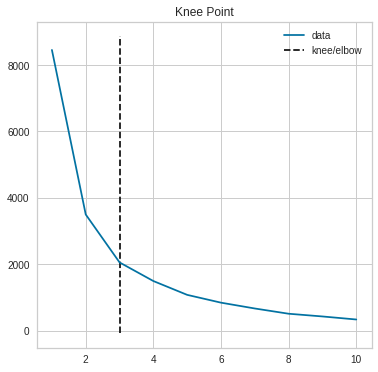

In [110]:
kneedle.plot_knee()

### 정제된 RFM 데이터로 최적의 k 찾기

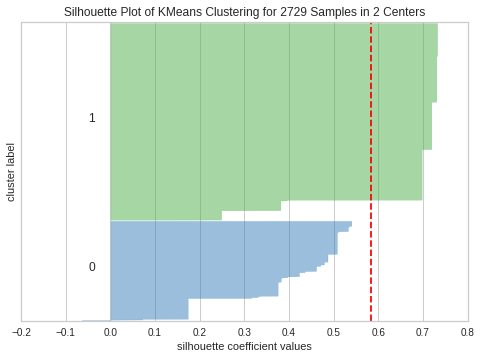

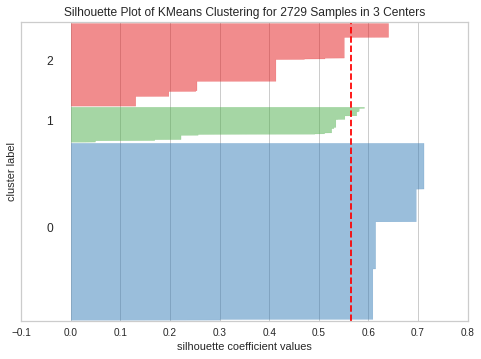

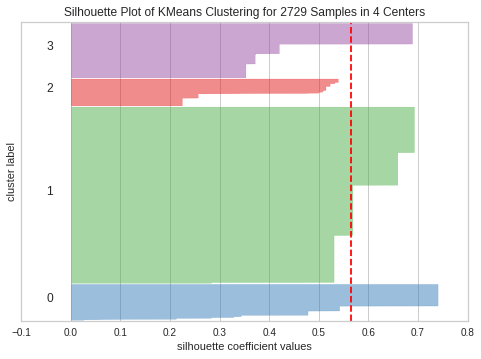

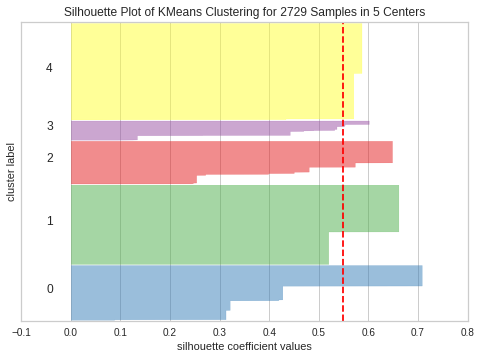

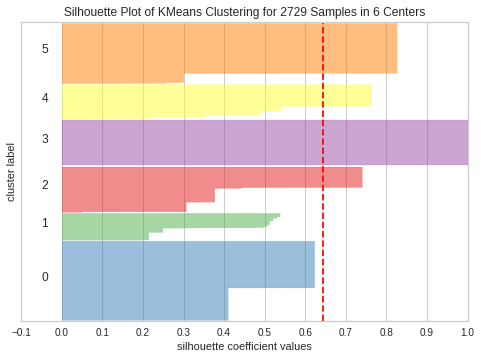

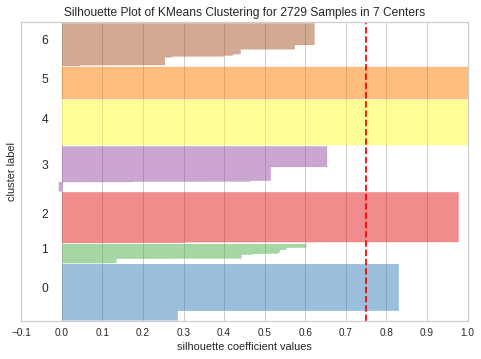

In [112]:
k_range = range(2, 8)
for i in k_range:
  km = KMeans(n_clusters=i, init="k-means++")
  visualizer=SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

### 정규화된 데이터로 훈련된 K-Means 결과 확인/해석

In [116]:
model = KMeans(n_clusters=5)
km = model.fit(train_x)
km_label = km.labels_

rfm_train_df = train_x.copy()
rfm_train_df[["R_score", "F_score", "M_score"]] = rfm_train_df[["R_score", "F_score", "M_score"]].astype(int)
rfm_train_df["km_label"] = km_label

rfm_cluster_df = rfm_train_df.groupby("km_label").mean()
rfm_cluster_df["point_cnt"] = rfm_train_df["km_label"].value_counts()
rfm_cluster_df

,R_score,F_score,M_score,point_cnt
km_label,,,,
0,1.528889,1.001111,2.012222,900
1,3.666008,1.000000,1.426877,506
2,4.177711,1.066265,3.141566,332
3,1.590541,1.000000,1.000000,740
4,4.482072,2.760956,4.247012,251


In [117]:
# K-means 모델에 test 데이터 예측
test_cluster = km.predict(test_x)

rfm_test_df = test_x.copy()
rfm_test_df[["R_score", "F_score", "M_score"]] = rfm_test_df[["R_score", "F_score", "M_score"]].astype(int)
rfm_test_df[["km_label"]] = test_cluster

rfm_test_cluster_df = rfm_test_df.groupby("km_label").mean()
rfm_test_cluster_df["point_cnt"] = rfm_test_df["km_label"].value_counts()
rfm_test_cluster_df

,R_score,F_score,M_score,point_cnt
km_label,,,,
0,1.551181,1.000000,2.015748,254
1,3.616000,1.000000,1.464000,125
2,4.138462,1.061538,3.184615,65
3,1.615819,1.000000,1.000000,177
4,4.483871,2.758065,4.274194,62


In [118]:
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"orange", 5:"silver"}
rfm_test_df["km_label_color"] = rfm_test_df["km_label"].map(LABEL_COLOR)

In [119]:
rfm_test_df.head()

,R_score,F_score,M_score,km_label,km_label_color
364,2,1,2,0,red
3146,2,1,1,3,yellow
1550,5,4,4,4,orange
449,1,1,2,0,red
1103,4,2,4,4,orange


In [121]:
fig = go.Figure(data=[go.Scatter3d(x=rfm_test_df["R_score"],
                                   y=rfm_test_df["F_score"],
                                   z=rfm_test_df["M_score"],
                                   mode='markers',
                                   marker=dict(color=rfm_test_df["km_label_color"], opacity=0.5))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                      xaxis= dict(
                          title="R_score"),
                      yaxis=dict(
                          title="F_score"),
                      zaxis=dict(
                          title="M_score"),
                  ),)

fig.show(showlegend=True)

In [122]:
# 훈련결과 label 원데이터셋에 저장하기
trained_rfm_df = pd.concat([rfm_train_df, rfm_test_df])
trained_rfm_df = user_stats_df.join(trained_rfm_df)
trained_rfm_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label,km_label_color
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,3,1,1,1,green
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,3,NaN


### 고객 군집화를 통해 멤버십 등급의 특징을 파악

In [124]:
# Labeling된 데이터 불러오기
user_metadata_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_metadata_with_labels.csv"
user_stats_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_with_labels.csv"
user_rfm_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_rfm_with_labels.csv"

trained_user_metadata_df = pd.read_csv(user_metadata_with_labels_url, parse_dates=[0])
trained_user_stats_df = pd.read_csv(user_stats_with_labels_url, parse_dates=[0])
trained_rfm_df = pd.read_csv(user_rfm_with_labels_url, parse_dates=[0])

In [128]:
trained_user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0


In [127]:
trained_user_metadata_df = trained_user_metadata_df.drop(columns="Unnamed: 0")

In [129]:
# 메타데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교
trained_user_metadata_df.groupby("label_from_km").agg(user_cnt=("user_id", "count"),
                                                      avg_category_prefer=("category_prefer", "mean"),
                                                      avg_years_from_joined=("years_from_joined", "mean"),
                                                      avg_age=("age","mean"))

,user_cnt,avg_category_prefer,avg_years_from_joined,avg_age
label_from_km,,,,
0,1599,5.747342,0.997999,26.535960
1,1074,5.014898,3.223091,30.870577
2,739,1.499323,1.490934,43.078484


In [130]:
# 메타데이터 그룹의 명칭 할당하기
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km==0), "group_name"] = "Young&Trendy Customers"
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km==1), "group_name"] = "Loyal Customer"
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km==2), "group_name"] = "Aged Customers"

In [131]:
# 메타데이터와 고객멤버십 등급의 연관성 찾기
ttl_membership_cnt = trained_user_metadata_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [132]:
metadata_pivot_df = pd.pivot_table(trained_user_metadata_df,
                                   values="user_id",
                                   columns=["group_name"],
                                   index=["membership_type"],
                                   aggfunc="count")
metadata_pivot_df

group_name,Aged Customers,Loyal Customer,Young&Trendy Customers
membership_type,,,
100,538,821,1308
300,143,170,200
400,36,43,47
500,22,40,44


In [133]:
metadata_pivot_df["Aged Customers"] = metadata_pivot_df["Aged Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Loyal Customer"] = metadata_pivot_df["Loyal Customer"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Young&Trendy Customers"] = metadata_pivot_df["Young&Trendy Customers"]/ttl_membership_cnt["user_id"]

In [134]:
metadata_pivot_df

group_name,Aged Customers,Loyal Customer,Young&Trendy Customers
membership_type,,,
100,0.201725,0.307837,0.490439
300,0.278752,0.331384,0.389864
400,0.285714,0.341270,0.373016
500,0.207547,0.377358,0.415094


In [136]:
# 거래데이터 그룹의 특징으로 naming 해보기
# label이 없는 그룹의 그룹명을 임의로 할당
trained_user_stats_df["scaled_hdbscan_label"] = np.where(trained_user_stats_df["scaled_hdbscan_label"].isnull(), 99, trained_user_stats_df["scaled_hdbscan_label"])
trained_user_stats_df["scaled_hdbscan_label"] = trained_user_stats_df["scaled_hdbscan_label"].astype(int)

In [137]:
trained_user_stats_df.head(2) # label이 할당되지 않은 경우에는 전부 99로 입력되어있음.

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,99
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,99


In [140]:
trained_user_stats_df.groupby("scaled_hdbscan_label").agg(
    user_cnt=("user_id", "count"),
    avg_total_order_cnt=("total_order_cnt", "mean"),
    avg_cost=("avg_cost", "mean"),
    avg_days_of_recency=("days_of_recency", "mean"),
    avg_monthly_order_cnt=("monthly_order_cnt", "mean")
)

,user_cnt,avg_total_order_cnt,avg_cost,avg_days_of_recency,avg_monthly_order_cnt
scaled_hdbscan_label,,,,,
-1,269,49.708029,45459.533029,167.222628,9.138382
0,10,18.400000,36121.140000,158.300000,3.235000
1,14,92.785714,33595.725714,181.571429,15.464286
2,30,69.966667,38977.182000,180.300000,11.661111
3,239,31.476987,33930.042008,178.677824,5.420990
99,2845,2.169772,30377.488383,66.614060,1.251148


In [141]:
# 메타데이터 그룹 명칭 할당
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 99), "group_name"] = "Unqualified Customer(-)" #군집화에서 제외됨
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == -1), "group_name"] = "High Price&Avg Orders Customer"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 0), "group_name"] = "High Price&Low Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 1), "group_name"] = "Top Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 2), "group_name"] = "Lately&Freq Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 3), "group_name"] = "Average Customers"

In [143]:
trained_user_stats_df.head(8)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label,group_name
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96,99,Unqualified Customer(-)
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17,99,Unqualified Customer(-)
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136,99,Unqualified Customer(-)
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62,99,Unqualified Customer(-)
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175,3,Average Customers
5,nal5muXdo7PEneo,100,1.0,22500.0,0.0,0.0,1.000,1.00,22500.00,16000.00,2020-04-20,111,99,Unqualified Customer(-)
6,PRGJ2EIUj9UJp1h,100,2.0,17000.0,0.0,0.0,1.000,1.00,8500.00,0.00,2020-03-17,77,99,Unqualified Customer(-)
7,rLEopFnsXPchlRu,100,2.0,43000.0,-2500.0,0.0,1.000,1.00,21500.00,8000.00,2020-03-10,70,99,Unqualified Customer(-)


In [144]:
# 거래데이터와 고객멤버십 타입의 연관성 찾기
ttl_membership_cnt = trained_user_stats_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2662
300,513
400,126
500,106


In [145]:
user_stats_pivot_df = pd.pivot_table(trained_user_stats_df,
                                     values="user_id",
                                     columns=["group_name"],
                                     index=["membership_type"],
                                     aggfunc="count")
user_stats_pivot_df

group_name,Average Customers,High Price&Avg Orders Customer,High Price&Low Orders Customers,Lately&Freq Customers,Top Orders Customers,Unqualified Customer(-)
membership_type,,,,,,
100,NaN,0.0,NaN,NaN,NaN,2662.0
300,176.0,168.0,7.0,13.0,2.0,147.0
400,40.0,43.0,3.0,9.0,4.0,27.0
500,23.0,58.0,NaN,8.0,8.0,9.0


In [147]:
for i in range(0, user_stats_pivot_df.shape[1]):
  user_stats_pivot_df.iloc[:, i] = user_stats_pivot_df.iloc[:, i] / ttl_membership_cnt["user_id"]
user_stats_pivot_df

group_name,Average Customers,High Price&Avg Orders Customer,High Price&Low Orders Customers,Lately&Freq Customers,Top Orders Customers,Unqualified Customer(-)
membership_type,,,,,,
100,NaN,0.000000,NaN,NaN,NaN,1.000000
300,0.343080,0.327485,0.013645,0.025341,0.003899,0.286550
400,0.317460,0.341270,0.023810,0.071429,0.031746,0.214286
500,0.216981,0.547170,NaN,0.075472,0.075472,0.084906
